<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/07b_Multidimensional_lorenz_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional differential equations

- Börge Göbel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Lorenz system

We solve the three coupled differential equations



\begin{eqnarray}
{\dot{x}= a(y-x) \\
\dot{y} = x(b-z)-y \\
\dot{z} = xy-cz}
\nonumber
\end{eqnarray}


Here \\( x,y,z \\) are the coordinates and \\( a,b,c \\) are coefficients

In [2]:
def f_ODE(t,r,a,b,c):
    x, y, z = r
    x1 = a*(y-x)
    y1 = x*(b-z)- y
    z1 = x*y - c*z
    return [x1,y1,z1]

### Chaotic solution: For b > 24.74, two repulsive points exist

In [3]:
a = 10.0
b = 50.0
c = 8.0/3.0

tStart = 0
tEnd = 50

x0 = 1.0
y0 = 0.0
z0 = 0.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], [x0,y0, z0], method = "RK45", t_eval = np.linspace(tStart, tEnd, 5001), args = (a,b,c))

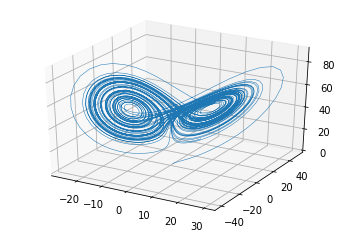

In [4]:
plottrayectory = plt.axes(projection = "3d")
plottrayectory.plot3D(solution.y[0], solution.y[1], solution.y[2], linewidth = 0.5)

In [5]:
solution2 = integrate.solve_ivp(f_ODE, [tStart, tEnd], [1.1*x0,y0, z0], method = "RK45", t_eval = np.linspace(tStart, tEnd, 5001), args = (a,b,c))

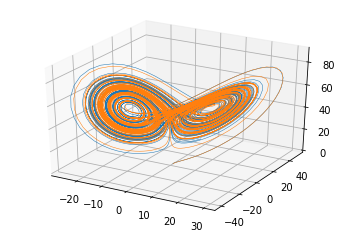

In [7]:
plottrayectory = plt.axes(projection = "3d")
plottrayectory.plot3D(solution.y[0], solution.y[1], solution.y[2], linewidth = 0.5)
plottrayectory.plot3D(solution2.y[0], solution2.y[1], solution2.y[2], linewidth = 0.5)
plt.savefig("Lorentz_trajectory.png",dpi=300)

In [11]:
solution.y[:,-1]

array([ 6.69176994, 15.4121984 , 18.05599863])

In [12]:
solution2.y[:,-1]

array([-10.83414318,   2.08062531,  58.6011274 ])

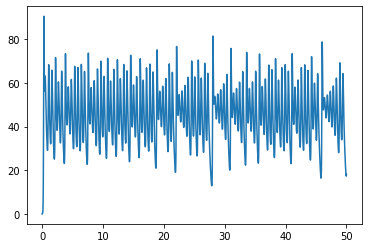

In [15]:
plt.plot(solution.t, solution.y[2])

### Non-chaotic solution: For b < 24.74, the two points become attractive

In [20]:
a = 10.0
b = 20.0
c = 8.0/3.0

tStart = 0
tEnd = 50

x0 = 1.0
y0 = 0.0
z0 = 0.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], [x0,y0, z0], method = "RK45", t_eval = np.linspace(tStart, tEnd, 5001), args = (a,b,c))
solution2 = integrate.solve_ivp(f_ODE, [tStart, tEnd], [1.1*x0,y0, z0], method = "RK45", t_eval = np.linspace(tStart, tEnd, 5001), args = (a,b,c))

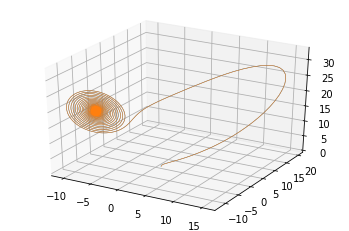

In [21]:
plottrayectory = plt.axes(projection = "3d")
plottrayectory.plot3D(solution.y[0], solution.y[1], solution.y[2], linewidth = 0.5)
plottrayectory.plot3D(solution2.y[0], solution2.y[1], solution2.y[2], linewidth = 0.5)
plt.savefig("Lorentz_trajectory2.png",dpi=300)